<a href="https://colab.research.google.com/github/Swayamprakashpatel/Release_Simulation/blob/main/Microsphere_Release_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is possible to create a simulation model for predicting the drug release profile of mixtures of your microparticles. The basic idea is to use the weighted average of the drug release profiles of each individual type of microparticle based on their proportions in the mixture.

Here are the steps to achieve this:

Data Preparation: Ensure you have the drug release data for each type of microparticle in a structured format (e.g., as CSV files).

Interpolation (if needed): If the time points are not the same for all types of microparticles, you may need to interpolate the data so that they align.

Weighted Averaging: Calculate the cumulative drug release for the mixture at each time point by taking a weighted average of the drug release profiles based on the proportions of each type of microparticle in the mixture.

Visualization: Plot the resulting drug release profile.

Below is the Python code to perform this simulation in Google Colab:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Step 1: Load data
# Replace 'file_path' with the actual paths to your CSV files
data_1_0 = pd.read_csv('path_to_file_1_0.csv')
data_1_1 = pd.read_csv('path_to_file_1_1.csv')
data_1_2 = pd.read_csv('path_to_file_1_2.csv')
data_1_3 = pd.read_csv('path_to_file_1_3.csv')

# Assuming CSV files have columns 'Time' and 'CumulativeRelease'
time_points = np.linspace(0, max(data_1_0['Time'].max(), data_1_1['Time'].max(),
                                 data_1_2['Time'].max(), data_1_3['Time'].max()), num=100)

# Step 2: Interpolate data to common time points
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0 = interp_1_0(time_points)
release_1_1 = interp_1_1(time_points)
release_1_2 = interp_1_2(time_points)
release_1_3 = interp_1_3(time_points)

# Step 3: Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0 +
            proportions[1] * release_1_1 +
            proportions[2] * release_1_2 +
            proportions[3] * release_1_3)

# Example proportions: 20% 1:0, 30% 1:1, 0% 1:2, 50% 1:3
proportions = [0.8, 0.1, 0.0, 0.1]
weighted_release = calculate_weighted_release(proportions)

# Step 4: Plot the resulting drug release profile
plt.figure(figsize=(10, 6))
plt.plot(time_points, weighted_release, label='Mixture')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()


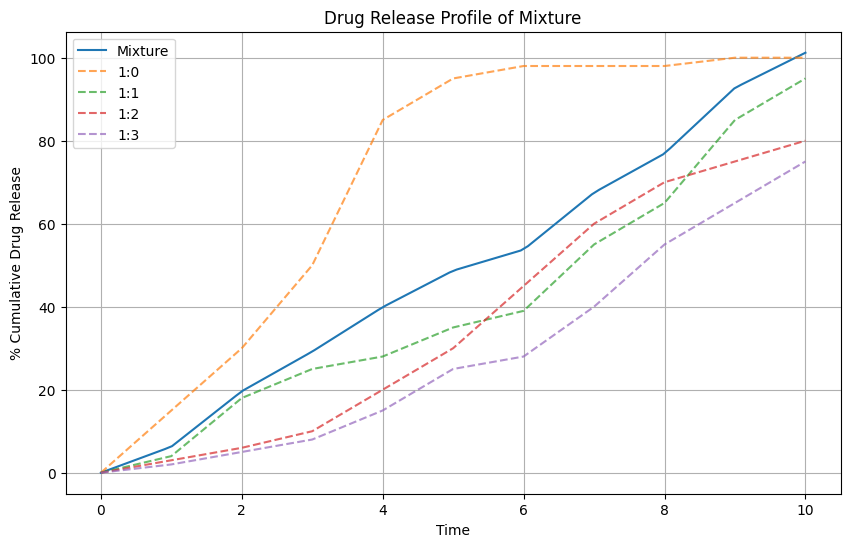

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Create dummy data
time_points = np.linspace(0, 10, 11)
release_1_0 = np.array([0, 15, 30, 50, 85, 95, 98, 98, 98, 100, 100])
release_1_1 = np.array([0, 4, 18, 25, 28, 35, 39, 55, 65, 85, 95])
release_1_2 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 75, 80])
release_1_3 = np.array([0, 2, 5, 8, 15, 25, 28, 40, 55, 65, 75])

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_1})
data_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_2})
data_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_3})

# Assuming CSV files have columns 'Time' and 'CumulativeRelease'
common_time_points = np.linspace(0, 10, 100)

# Step 2: Interpolate data to common time points
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_1_1_interp = interp_1_1(common_time_points)
release_1_2_interp = interp_1_2(common_time_points)
release_1_3_interp = interp_1_3(common_time_points)

# Step 3: Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_1_1_interp +
            proportions[2] * release_1_2_interp +
            proportions[3] * release_1_3_interp)

# Example proportions: 20% 1:0, 30% 1:1, 0% 1:2, 50% 1:3
proportions = [0.2, 0.7, 0.09, 0.1]
weighted_release = calculate_weighted_release(proportions)

# Step 4: Plot the resulting drug release profile
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, label='Mixture')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()


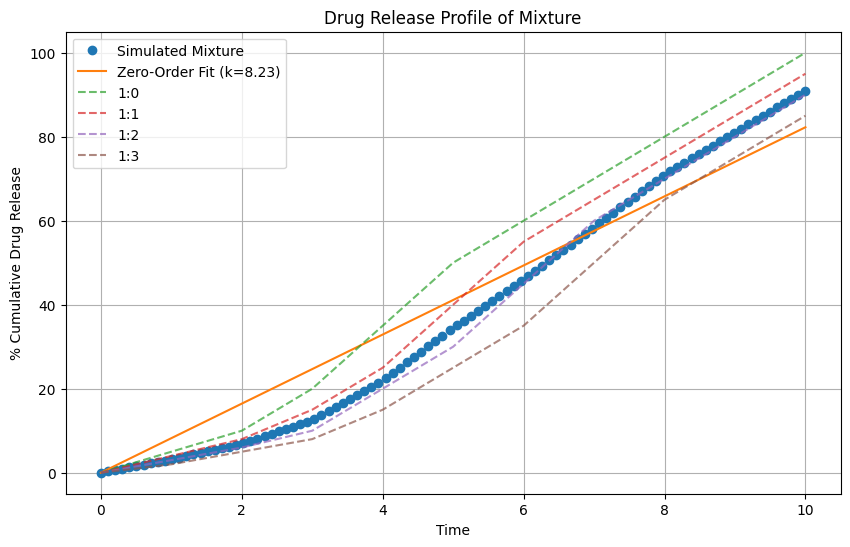

Zero-order rate constant: k = 8.23
Optimized proportions: [9.99999970e-01 4.05920750e-08 2.45184231e-08 0.00000000e+00]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Dummy data for illustration (replace with your actual data)
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_1_0 = np.array([0, 5, 10, 20, 35, 50, 60, 70, 80, 90, 100])  # Dummy release data for 1:0
release_1_1 = np.array([0, 4, 8, 15, 25, 40, 55, 65, 75, 85, 95])   # Dummy release data for 1:1
release_1_2 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 80, 90])   # Dummy release data for 1:2
release_1_3 = np.array([0, 2, 5, 8, 15, 25, 35, 50, 65, 75, 85])    # Dummy release data for 1:3

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_1})
data_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_2})
data_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_3})

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_1_1_interp = interp_1_1(common_time_points)
release_1_2_interp = interp_1_2(common_time_points)
release_1_3_interp = interp_1_3(common_time_points)

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_1_1_interp +
            proportions[2] * release_1_2_interp +
            proportions[3] * release_1_3_interp)

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Example proportions: Adjust these to find the best fit
proportions = [0.2, 0.3, 0.0, 0.5]
weighted_release = calculate_weighted_release(proportions)

# Curve fitting to zero-order model
params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
k = params[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the rate constant
print(f'Zero-order rate constant: k = {k:.2f}')

# Optimize proportions to achieve zero-order release
from scipy.optimize import minimize

def objective(proportions):
    weighted_release = calculate_weighted_release(proportions)
    params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
    k = params[0]
    residuals = weighted_release - zero_order_kinetics(common_time_points, k)
    return np.sum(residuals**2)

initial_proportions = [0.25, 0.25, 0.25, 0.25]
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
optimized_proportions = result.x

print(f'Optimized proportions: {optimized_proportions}')


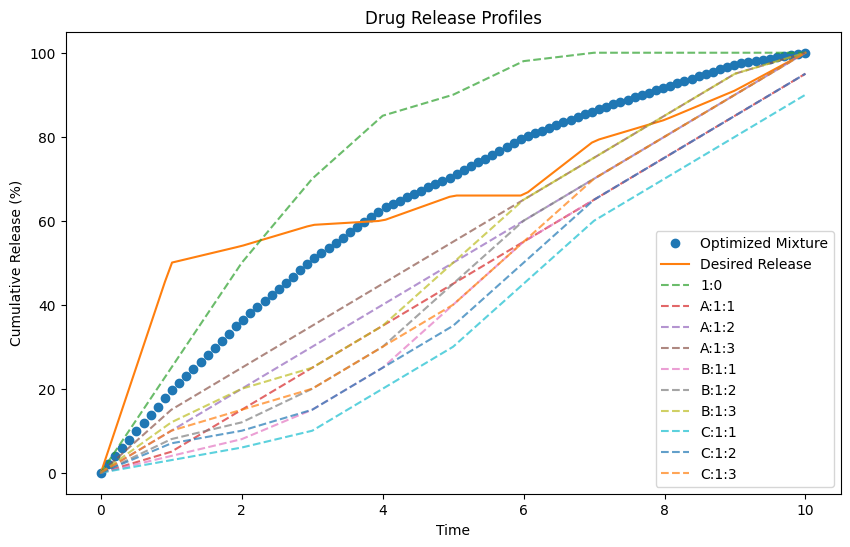

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize

# Dummy data for illustration (replace with your actual data)
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_1_0 = np.array([0, 25, 50, 70, 85, 90, 98, 100, 100, 100, 100])  # Dummy release data for 1:0

# Release data for different polymers (A, B, C) with ratios (1:1, 1:2, 1:3)
release_A_1_1 = np.array([0, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])
release_A_1_2 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
release_A_1_3 = np.array([0, 15, 25, 35, 45, 55, 65, 75, 85, 95, 100])
release_B_1_1 = np.array([0, 4, 8, 15, 25, 40, 55, 65, 75, 85, 95])
release_B_1_2 = np.array([0, 8, 12, 20, 30, 45, 60, 70, 80, 90, 100])
release_B_1_3 = np.array([0, 12, 20, 25, 35, 50, 65, 75, 85, 95, 100])
release_C_1_1 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 80, 90])
release_C_1_2 = np.array([0, 7, 10, 15, 25, 35, 50, 65, 75, 85, 95])
release_C_1_3 = np.array([0, 10, 15, 20, 30, 40, 55, 70, 80, 90, 100])

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_A_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_1})
data_A_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_2})
data_A_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_3})
data_B_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_1})
data_B_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_2})
data_B_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_3})
data_C_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_1})
data_C_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_2})
data_C_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_3})

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_1 = interp1d(data_A_1_1['Time'], data_A_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_2 = interp1d(data_A_1_2['Time'], data_A_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_3 = interp1d(data_A_1_3['Time'], data_A_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_1 = interp1d(data_B_1_1['Time'], data_B_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_2 = interp1d(data_B_1_2['Time'], data_B_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_3 = interp1d(data_B_1_3['Time'], data_B_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_1 = interp1d(data_C_1_1['Time'], data_C_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_2 = interp1d(data_C_1_2['Time'], data_C_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_3 = interp1d(data_C_1_3['Time'], data_C_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_A_1_1_interp = interp_A_1_1(common_time_points)
release_A_1_2_interp = interp_A_1_2(common_time_points)
release_A_1_3_interp = interp_A_1_3(common_time_points)
release_B_1_1_interp = interp_B_1_1(common_time_points)
release_B_1_2_interp = interp_B_1_2(common_time_points)
release_B_1_3_interp = interp_B_1_3(common_time_points)
release_C_1_1_interp = interp_C_1_1(common_time_points)
release_C_1_2_interp = interp_C_1_2(common_time_points)
release_C_1_3_interp = interp_C_1_3(common_time_points)

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_A_1_1_interp +
            proportions[2] * release_A_1_2_interp +
            proportions[3] * release_A_1_3_interp +
            proportions[4] * release_B_1_1_interp +
            proportions[5] * release_B_1_2_interp +
            proportions[6] * release_B_1_3_interp +
            proportions[7] * release_C_1_1_interp +
            proportions[8] * release_C_1_2_interp +
            proportions[9] * release_C_1_3_interp)

# Desired drug release pattern (replace with your actual data)
desired_release = np.array([0, 50, 54, 59, 60, 66, 66, 79, 84, 91, 100])  # Example desired release

# Interpolating desired release to common time points
interp_desired_release = interp1d(time_points, desired_release, kind='linear', fill_value="extrapolate")
desired_release_interp = interp_desired_release(common_time_points)

# Objective function to minimize the difference between the weighted release and desired release
def objective(proportions):
    weighted_release = calculate_weighted_release(proportions)
    residuals = weighted_release - desired_release_interp
    return np.sum(residuals**2)

# Initial proportions (must sum to 1)
initial_proportions = np.ones(10) / 10
bounds = [(0, 1)] * 10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Optimize proportions
result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
optimized_proportions = result.x

# Calculate the optimized weighted release
optimized_weighted_release = calculate_weighted_release(optimized_proportions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, optimized_weighted_release, 'o', label='Optimized Mixture')
plt.plot(common_time_points, desired_release_interp, '-', label='Desired Release')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_A_1_1['Time'], data_A_1_1['CumulativeRelease'], '--', label='A:1:1', alpha=0.7)
plt.plot(data_A_1_2['Time'], data_A_1_2['CumulativeRelease'], '--', label='A:1:2', alpha=0.7)
plt.plot(data_A_1_3['Time'], data_A_1_3['CumulativeRelease'], '--', label='A:1:3', alpha=0.7)
plt.plot(data_B_1_1['Time'], data_B_1_1['CumulativeRelease'], '--', label='B:1:1', alpha=0.7)
plt.plot(data_B_1_2['Time'], data_B_1_2['CumulativeRelease'], '--', label='B:1:2', alpha=0.7)
plt.plot(data_B_1_3['Time'], data_B_1_3['CumulativeRelease'], '--', label='B:1:3', alpha=0.7)
plt.plot(data_C_1_1['Time'], data_C_1_1['CumulativeRelease'], '--', label='C:1:1', alpha=0.7)
plt.plot(data_C_1_2['Time'], data_C_1_2['CumulativeRelease'], '--', label='C:1:2', alpha=0.7)
plt.plot(data_C_1_3['Time'], data_C_1_3['CumulativeRelease'], '--', label='C:1:3', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Release (%)')
plt.legend()
plt.title('Drug Release Profiles')

plt.savefig('/content/drug_release.png', format='png', dpi=600)

# Display the plot
plt.show()

from google.colab import files

files.download('/content/drug_release.png')

plt.show()
